## 1. IMPORTANDO AS BIBLIOTECAS E OS DADOS DE TREINO E TESTE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

#Lendo os dados de treino e teste
caminho_dados = '../Dados_Treino_Teste'  
X_treino = pd.read_csv(f'{caminho_dados}/X_treino.csv')
X_teste = pd.read_csv(f'{caminho_dados}/X_teste.csv')
y_treino = pd.read_csv(f'{caminho_dados}/y_treino.csv').squeeze()
y_teste = pd.read_csv(f'{caminho_dados}/y_teste.csv').squeeze()

## 2. TREINANDO O MODELO DE RANDOM FOREST

       Verdadeiro  Predição
0             1.0       1.0
1             0.0       0.0
2             1.0       1.0
3             0.0       0.0
4             1.0       1.0
...           ...       ...
88162         1.0       1.0
88163         0.0       0.0
88164         0.0       0.0
88165         0.0       0.0
88166         0.0       0.0

[88167 rows x 2 columns]

Acurácia: 0.9996 — Proporção de acertos gerais do modelo.
Precisão: 0.9999 — Proporção de acertos entre as previsões positivas.
Recall: 0.9993 — Capacidade de encontrar todos os positivos reais.
F1-score: 0.9996 — Equilíbrio entre precisão e recall.


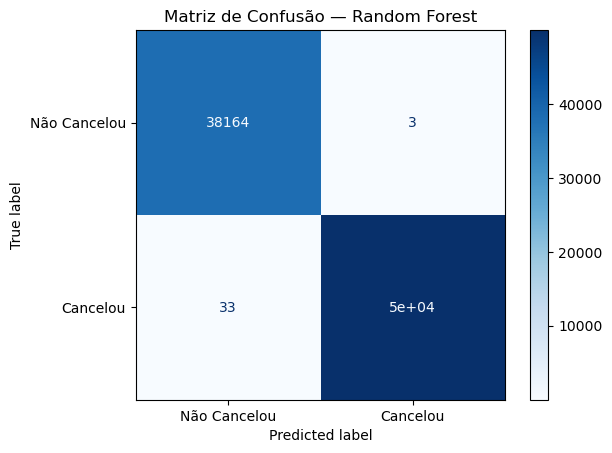

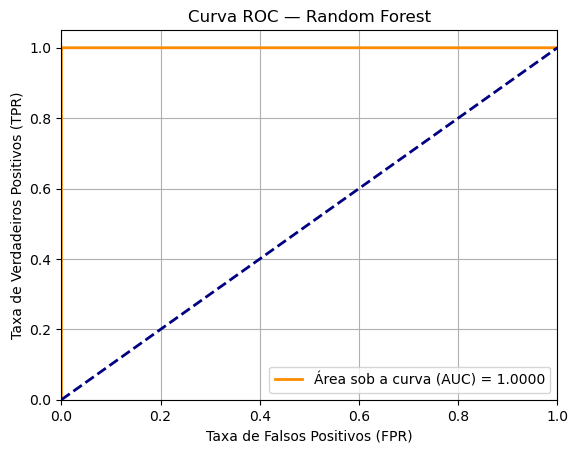

In [2]:
# Criando e treinando o modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_treino, y_treino)

# Fazendo previsões no modelo treinado
y_pred = modelo_rf.predict(X_teste)

# Criando um DataFrame para comparar as previsões com os valores reais
df_resultado = pd.DataFrame({'Verdadeiro': y_teste, 'Predição': y_pred})
print(df_resultado)

# Avaliação com as métricas

#A acurácia mede a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.
# Quanto mais alta a acurácia, melhor o desempenho do modelo em fazer previsões precisas
accuracy = accuracy_score(y_teste, y_pred)

# A precisão se concentra em quão precisas são as previsões positivas do modelo. 
#A precisão é uma métrica importante, especialmente em casos em que prever falsos positivos é indesejável
#Quanto maior a precisão, melhor o modelo é em evitar previsões positivas incorretas.
precision = precision_score(y_teste, y_pred)

# O recall se concentra em quão bem o modelo é capaz de capturar todas as instâncias positivas do conjunto de dados.
# O recall é uma métrica importante, especialmente em situações em que a não detecção de instâncias positivas (falsos negativos) é indesejável. 
# Quanto maior o recall, melhor o modelo é em identificar corretamente as instâncias positivas.
recall = recall_score(y_teste, y_pred)

#F1_Score é uma métrica que combina a precisão (proporção de previsões positivas corretas) e o recall (proporção de instâncias positivas reais que foram corretamente identificadas pelo modelo) em um único valor.
# Essa métrica fornece um equilíbrio entre precisão e recall.
#Um valor alto de F1-Score indica um equilíbrio positivo entre a precisão e o recall do modelo.
f_score = f1_score(y_teste, y_pred)

print(f"\nAcurácia: {accuracy:.4f} — Proporção de acertos gerais do modelo.")
print(f"Precisão: {precision:.4f} — Proporção de acertos entre as previsões positivas.")
print(f"Recall: {recall:.4f} — Capacidade de encontrar todos os positivos reais.")
print(f"F1-score: {f_score:.4f} — Equilíbrio entre precisão e recall.")

# Matriz de Confusão

matriz = confusion_matrix(y_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["Não Cancelou", "Cancelou"])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão — Random Forest')
plt.show()

# Curva ROC

y_probs = modelo_rf.predict_proba(X_teste)[:, 1]  # Pegando a probabilidade da classe positiva
fpr, tpr, thresholds = roc_curve(y_teste, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Área sob a curva (AUC) = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC — Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## 3. VALIDAÇÃO CRUZADA

In [3]:
from sklearn.model_selection import cross_val_score

# Lendo os dados de treino e teste
caminho_dados = '../Dados_Treino_Teste'
X_treino = pd.read_csv(f'{caminho_dados}/X_treino.csv')
X_teste = pd.read_csv(f'{caminho_dados}/X_teste.csv')
y_treino = pd.read_csv(f'{caminho_dados}/y_treino.csv').squeeze()
y_teste = pd.read_csv(f'{caminho_dados}/y_teste.csv').squeeze()

# Unificando treino e teste para usar tudo na validação cruzada
X = pd.concat([X_treino, X_teste], axis=0)
y = pd.concat([y_treino, y_teste], axis=0)

# Criando o modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicando a validação cruzada (com 5 folds)
scores = cross_val_score(modelo_rf, X, y, cv=5, scoring='accuracy')

# Imprimindo os resultados
print(f"Pontuações de Acurácia para cada fold: {scores}")
print(f"Média de Acurácia: {np.mean(scores):.4f}")
print(f"Desvio padrão de Acurácia: {np.std(scores):.4f}")

Pontuações de Acurácia para cada fold: [0.99954632 0.99955766 0.99960302 0.99952363 0.99958034]
Média de Acurácia: 0.9996
Desvio padrão de Acurácia: 0.0000


## 4. SALVANDO O MODELO RANDOM FOREST

In [4]:
joblib.dump(modelo_rf, 'modelo_random_forest.pkl')

['modelo_random_forest.pkl']